    APCV361 Spring 2022
    Dr. Li Xu
    Team Generic: 
        Cortland Diehm
        Katelyn Griffith
        Jake Sherwood

# Words of Engagement (APCV 361 Final Project)



# Introduction

The popularity of social media websites such as Twitter, Instagram, and Facebook have
become an irreplaceable mechanism for organizations and individuals alike to communicate
ideas and thoughts to a wide range of people, both in scope and character. Social media, and
Twitter in this case, can serve as a powerful apparatus for communicating news and events to
users. Due to the potential to influence or liaise with a large audience, the factors that go into the
popularity of a single posted tweet is invaluable information.

The nature of a tweet is to be succinct and concise, which makes the wording of these
posts more important to maximize the amount of engagement with an audience. In this study, we
analyzed the amount of engagement a tweet has from the University of Arizona’s College of
Agriculture and Life Sciences account “@UArizonaCALS” based on the wording found within
the tweet itself. This was done by collecting tweets from the account and sorting them into
categories based on the specific words found in the tweet. The number of favorites, known as
"likes," was used as a measure to analyze the engagement with the audience. Those likes were
associated with each category and analyzed through graphing and comparison tests in this
study.

# Project Design and Development

For the design of this project, the data was extracted and sorted via Python and then graphed/analyzed using tools provided by the Matplot package. For the extraction of twitter data, we used tools available through Python and the Twitter Developer API. Using Tweepy, an open-source Python package, the data from the “@UArizonaCALS” twitter account (around 1100 tweets) was extracted and saved to a separate CSV file. In this CSV file, each tweet was saved along with its corresponding 'like' count. 

The categories in which the tweets were separated into are based on multiple text files (with each text file being their own category of words). Each file holds their own unique list of keywords that correspond to that category. For example, if the category of tweets we want to analyze falls under “Climate”, then the tweets that contain keywords associated with climate found in the category’s text file were separated into a separate group. Once all of the tweets were separated into their rightful categories, the data for each category was saved to their own CSV file, which served as the basis for the analysis and comparisons later. 

Once the tweets were sorted into their appropriate categories, we implemented the Matplotlib package for the visualizations and models. The data collected was graphed onto various models, including bar plots and Wordcloud visualizations. Each category was graphed onto a bar plot, illustrating all of the words within that category and their corresponding like counts. Along with the graphs for each category, two more graphs comparing the total like counts of each category and the top ten most-liked words respectively were created to further illustrate which words are associated with increased popularity. With the results of these graphs, we were able to analyze which categories and which words were most likely to have an increased like count in a tweet. 

## Step One: Gathering Tweets to Use

The first process was gathering tweets to use for our project. We started by creating an API instance using `tweepy`. Keys were stored in a separate `keys.py` file to to enhance protection and allow us to interchange our keys to access the API.

In [1]:
# -------------------
# Create API instance
# -------------------


import tweepy

def create_api(key, secret, authtoken, tokensecret):
    auth = tweepy.OAuthHandler(key, secret)
    auth.set_access_token(authtoken, tokensecret)

    # Create API object
    api = tweepy.API(auth, wait_on_rate_limit=True)

    # Test authentication
    try:
        api.verify_credentials()
        #print('You\'ll Succeed, Eventually') # Secret confirmation message
        #api.update_status('You\'ll Succeed, Eventually.') # Debugging only
    except:
        print('There was an error during authentication\n')
    return api # Returns API object

# Keys for authentication

from keys import consumer_key as key
from keys import consumer_secret as secret
from keys import access_token as authtoken
from keys import access_token_secret as tokensecret

api = create_api(key, secret, authtoken, tokensecret)

Next we defined code to collect tweets from `UArizonaCALS` to store into an array. This included the timestamp of when the tweet was created, the user (in case we wanted to include others), and the full text of the tweet. Debugging code was provided at the end to verify the number of tweets were were able to retrieve.

In [3]:
# --------------------------------------------------
# Retrieve Tweets
# Run this if you want to repopulate the tweets list
# --------------------------------------------------


def get_tweets(tweeter, count=20):
    # Input:  Twitter handle of user, how many tweets to count (default 20 to prevent Timeout)
    # Output: Array of tweets' timestamp, user, and full text
    arr = []
    
    # Define what kind of tweets you want selected from timeline
    timeline = tweepy.Cursor(api.user_timeline, 
                             screen_name=tweeter, 
                             tweet_mode='extended', # full text
                             exclude_replies=True, # reply tweets
                             include_rts=False # retweets
                            ).items()
    for status in timeline:
        if count > 0:
            arr.append([status.full_text, status.favorite_count, status.created_at])
            count -= 1
        else:
            break
    return arr

def print_tweets(arr, count=2):
    # Input:   Array of tweets, how many tweets to print (default 2)
    # Output:  None
    # Display: Tweet counter, timestamp, user, and full text of tweet
    x = count
    for tweet in arr:
        if count > 0:
            print(str(x-count+1), tweet[0], tweet[1], tweet[2], sep='\t')
            count -= 1
        else:
            break
    #print('\nTotal of', x, 'tweets displayed from', len(arr))

tweeter = 'UArizonaCALS'
limit = 5000 # Limits the number of tweets to retrieve
tweets = get_tweets(tweeter, count=limit)
#try:
    #print_tweets(tweets) # Debugging only
#except:
    #print('There was an error printing the tweets.')

To avoid timeout from the API, we saved what we collected to a CSV file so we can pull the data from the CSV without having to re-run the above code.

In [4]:
# ----------------------------------------------------
# Save tweets to text file so we can run code
# without running API commands again. (Avoids Timeout)
# ----------------------------------------------------


import pandas as pd

def write_to_csv(tweets, filename='output.csv'):
    # Input:  Array of tweets
    # Output: None
    
    # Create dataframe
    col = ['Tweet','FavoritesCount','Timestamp']
    data = []
    try:
        for tweet in tweets:
            tweet[0] = tweet[0].replace('\n',' ') # Replace newline characters
            tweet[0] = tweet[0].replace(',', '') # Replace commas
            data.append(tweet)
        df = pd.DataFrame(data, columns=col)
        df.to_csv(filename, sep=',')
        #print('Tweets written to file', filename)
    except:
        print('There was an error in writing the tweets to csv file.')

write_to_csv(tweets, 'tweets.csv')

## Step Two: Creating Classes for Categories and Words

We needed to keep track of the like count for each word in each category. To do this we implemented dictionaries to look for specific words to each category and keep track of the favorites count. The next step was to define what words we wanted to search for and what to categorize the words under. Since this list can change as the project evolves, we elected to use simple TXT files to store the words for each category. These files will be included in the submission for this project.

In [1]:
# -----------------------------------------
# Defining classes for categories and words
# -----------------------------------------


# class Cat is the categories

class Cat():
    def __init__(self, name):
        self.words = {}      # Dictionary of words
        self.name = name     # Name of category
        self.totalLikes = 0  # Total Likes for category
        
    def getWords(self):
        return self.words
    
    def getName(self):
        return self.name
    
    def gettotalLikes(self):
        return self.totalLikes
    
    def addWord(self, key, w):
        self.words[key] = w
        
    def incLikes(self, wLikes):
        self.totalLikes += wLikes
        
    def __str__(self):
        return f'Words: {self.words}'

# class Word is the individual word

class Word():
    def __init__(self, word, cat='none'):
        self.word = word       # Word
        self.likeCount = 0     # Total likes for word
        self.myCategory = cat  # Category the word belongs to ~ Jake
        
    def setlikeCount(self, likes):
        self.likeCount += likes
        
    def getWord(self):
        return self.word
    
    def getlikeCount(self):
        return self.likeCount
    
    def __str__(self):
        return f'Words: {self.word}\nLike Count: {self.likeCount}'
    
    def getCategory(self):
        # Return which category the word belongs to ~ Jake
        return self.myCategory
    
# Verify classes were created successfully
#print('Category and Word classes created.')


# ---------------------------------
# Creating dictionary of categories
# ---------------------------------


# Load file
def loadFile(filepath, display=False):
    try:
        f = open(filepath, 'r', encoding="utf-8")
        pList = f.readlines()
        f.close()
        #if display != False:
            #print(len(pList), ' lines read from ', filepath,'.', sep='')
        return pList
    
    except FileNotFoundError:
        print("File", filepath, "could not be located. Halting...")
        exit()

# Create category list
def buildCategories(catlist):
    dictionary = {}
    
    for category in catlist:
        c = Cat(category)
        dictionary[c.getName()] = c
    
    return dictionary

categories = ['Climate',\
 'Employment',\
 'Congratulations',\
 'Research',\
 'Scholarships',\
 'WomenInStem']
dictionarium = buildCategories(categories)
#print('Dictionarium created.')

# Create word list
def buildWords(wordFiles, dictionary):
    categories = list(dictionary.keys())
    
    for f in range(len(wordFiles)):
        fl = loadFile(wordFiles[f], display=True)
        
        # Add words to dict
        for w in range(len(fl)):
            q = Word(fl[w][:-1], cat=categories[f])
            dictionary[categories[f]].addWord(q.getWord(), q)
            
    return dictionary

# Add words to Dictionarium
filenames = ['climate.txt',\
 'employment.txt',\
 'congratulations.txt',\
 'research.txt',\
 'scholarships.txt',\
 'women_in_stem.txt']
dictionarium = buildWords(filenames, dictionarium)
#print('Words added to dictionarium.')

# Open the tweets file
t = loadFile('tweets.csv', display=True)

for i in range(1, len(t)):
    t2 = t[i].split(',') # Delimiter in CSV file
    t3 = t2[1].lower().split() # Lowercase and split all words

    # Go through each tweet
    for word in t3:

        # Go through each section
        for key in dictionarium:
            wordlist = dictionarium[key].getWords() # Get words for section

            # Go through each word for each section
            for value in wordlist:

                # Update Like counts
                if value in word:
                    dictionarium[key].words[value].setlikeCount(int(t2[2]))
                    dictionarium[key].incLikes(int(t2[2]))
                    break
#print('Dictionarium updated with total likes in each category:')

cat_likes = []
for cat in dictionarium:
    cat_likes.append(dictionarium[cat].gettotalLikes())   #Added cat_list for easier access to likes for each category ~Cortland
    #print(f"  {cat+':':<16} {dictionarium[cat].gettotalLikes():>5}")

## Step Three: Visualizations of the Data

Next we took the data created in the previous cells and started to graph them for comparisons. The first visualization we created was a bar graph comparing each category by the number of likes associated with it. Next, when comparing like counts within each category of words, we created six bar-subplots comparing the like data for each indvidual word. For these plots, any word that had zero likes associated with it were dropped from the visualization to avoid clutter and streamline the models.

Finally, the final graph created in this cell displayed the Top Ten most-liked words, no matter which category they came from. Each word is color-coded, corresponding to the category in which it came. 

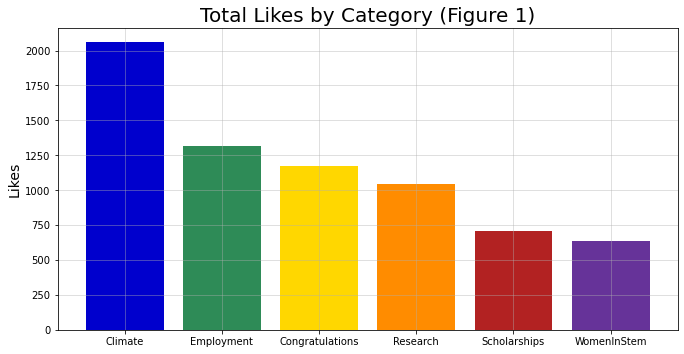

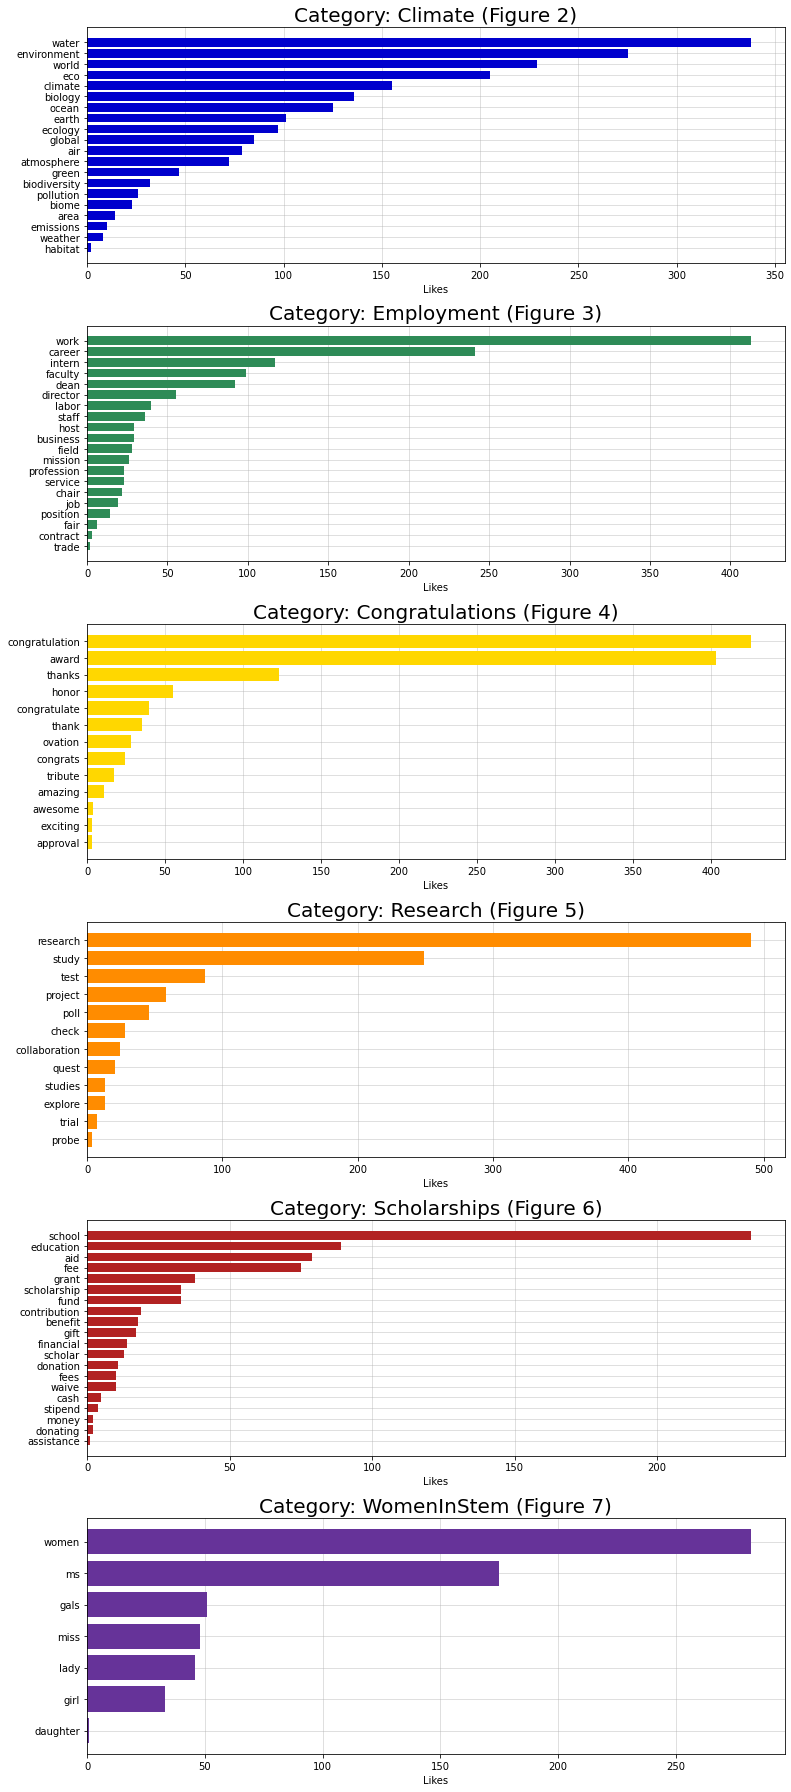

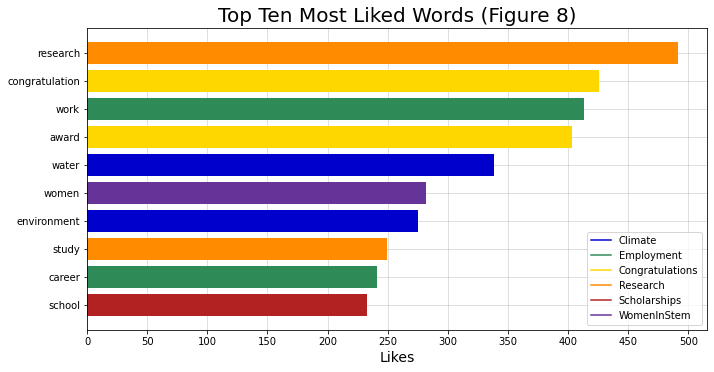

In [2]:
#----------------------------------
# Creating visualizations from the data
#----------------------------------


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Bar Graph of Categories and Corresponding Likes
cats = list(dictionarium.keys())
colors = ['mediumblue', 'seagreen', 'gold', 'darkorange', 'firebrick', 'rebeccapurple']

# Total likes in each category
plt.figure(figsize=(800/72,400/72))
plt.grid(True, alpha=0.5)
plt.rcParams['axes.axisbelow'] = True
plt.ylabel('Likes', fontsize=14)
plt.title('Total Likes by Category (Figure 1)', fontsize=20)
plt.bar(cats, cat_likes, tick_label=cats, color=colors)
#plt.yticks(np.linspace(0,1500, 31))

# --------------------------------------
# Total likes for words in each category
# --------------------------------------

fig, axs = plt.subplots(6, 1, figsize=(800/72, 6*300/72)) # 6 rows, 1 columns
i = 0
title_count = ['2', '3', '4', '5', '6', '7'] #Added title_count so each subplot iteration is labeled by number
for ax in axs.flat:
    top20 = []
    words = dictionarium[cats[i]].getWords()
    #x, y = [], []
    for word in words:
        x = dictionarium[cats[i]].words[word].getlikeCount()
        if x > 0:
            top20.append((word, x))
    
    # Sort toptwenty array by number of likes
    top20 = sorted(top20, key=lambda a: a[1], reverse=True)

    # Keep the top 20 words
    if len(top20) > 20:
        top20 = top20[:20]

    # Sort to arrays
    x, y = [], []
    for w in top20:
        y.insert(0, w[0])
        x.insert(0, w[1])
    
    # Draw the graph
    ax.grid(True, alpha=0.5)
    #ax.set_xticks(np.linspace(0, 1000, 21))
    ax.set_title('Category: '+cats[i] + ' (Figure '+title_count[i]+')', fontsize=20)
    ax.set_xlabel('Likes')
    ax.barh(y, x, color=colors[i])
    i += 1

fig.tight_layout()

#------------------------------
# Histogram of most liked words
#------------------------------

# Finding the top ten most liked words
topten = []
i = 0
for c in categories:
    # categories were defined in Katelyn's code
    for word in dictionarium[c].words:
        y = dictionarium[c].words[word].getlikeCount()
        x = word
        z = colors[i]
        topten.append((x, y, z))
    i += 1
# Sort the words by most liked
topten = sorted(topten, key=lambda a: a[1], reverse=True)
# Keep the top ten words
topten = topten[:10]

# Make the graph
plt.figure(figsize=(800/72,400/72))
plt.grid(True, alpha=0.5)
plt.rcParams['axes.axisbelow'] = True
plt.xlabel('Likes', fontsize=14)
plt.xticks(np.linspace(0, 1000, 21))
plt.title('Top Ten Most Liked Words (Figure 8)', fontsize=20)

# Sort tuple elements into arrays
x, y, z = [], [], []
for word in topten:
    x.insert(0, word[0])
    y.insert(0, word[1])
    z.insert(0, word[2])
plt.barh(x, y, color=z)

# Add the legend before showing the graph
h = []
i = 0
for c in cats:
    line1, = ax.plot(0, label=c, color=colors[i])
    h.append(line1)
    i += 1
plt.legend(handles=h)


plt.show()

## Step Four: Creating a Word Cloud

To better visualize the occurrance of words and frequency of likes associated to tweets with such words, we created a word cloud; Essentially a mass of words that scales a word based on frequency, thereby showing an image of different words at different scaled sizes. The first word cloud was created from data from all categories, producing a good model for visualizing the most popular words in the dataset. The subsequent word clouds were based on data gathered from each individual category, showing the most popular words within their group.  

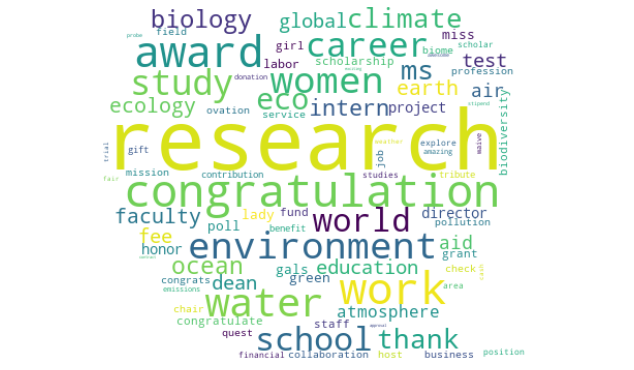

In [4]:
# ---------------------
# Creating a Word Cloud
# ---------------------


import matplotlib.pyplot as plt
import wordcloud as wc
import numpy as np
import random
from PIL import Image

"""
Theory: To make this code work for our purposes, we'll need to 
create a string of the words found in each category and append 
each word by the number of times it occurs.

x Goal: Generate graph by frequency of words in all categories.
  Goal: Generate graph by likes for a word in all categories.
  Ex. Goal: Use different images for word clouds.

"""

categories = dictionarium.keys()
string = ''
for c in categories:
    for w in dictionarium[c].getWords():
        n = dictionarium[c].words[w].getlikeCount()
        string += (w+' ')*n

def word_cloud(string, filename=None, size=(800/72, 800/72)):
    """
    Input:  A string and an image file you would like to use. Please use a file that ends in .jpg.
    Output: Wordcloud graph
    """
    m = None
    if filename != None:
        m = np.array(Image.open(filename))
    
    cloud = wc.WordCloud(max_font_size=1000,\
     collocations=False,\
     mask=m,\
     background_color='white').generate(string)
    plt.figure(figsize=size)
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Display word cloud for all categories
word_cloud(string, filename='lxu.jpg')


# Results and Discussion



### Category Comparison Results

The first of the results to be analyzed are the results found in Figure 1, which displays the total likes by category. From our initial data comprising of 1,152 tweets from the University of Arizona CALS twitter account, the category of “Climate” garnered the most amount of likes by a considerable margin. The Climate category had 2,060 likes associated with it, whereas the category with the least amount of likes was the “Women In Stem” category, which garnered only 636 likes total. 
For the next group of data gathered from the results, we will analyze Figures 2 through 7. These figures display and compare the number of likes associated with each word within their respective categories, allowing for a more concentrated examination of the data. 

### Category Subplot Results

1) **Figure 2 (Climate):** Figure 2 has the widest variety of data (with 2,060 likes associated with the category), and the most liked word was “Water”, which has 340 total likes associated with it. The word with the least amount of likes associated with it was the word “Habitat”, which only had 5 likes associated with it.

2) **Figure 3 (Employment):** Figure 3 has a total like count of 1,317, but the data is most skewed with the top two words within the category: “Work”, the most popular word with 440 likes, and “Career” with 240 likes. The least-liked word in the category, “Trade”, only had 2 likes associated with it.

3) **Figure 4 (Congratulations):** Figure 4 has a total like count of 1,172, and like Figure 3, the likes are mostly concentrated with the top two words: “Congratulation”, which has 450 likes, and “Award”, which has 408 likes. There are three words tied for the least-liked word, and they are “Awesome”, “Exciting”, and “Approval”, which all have only 6 likes associated with them.

4) **Figure 5 (Research):** Figure 5 has a total like count of 1,041, and it also follows the trend of likes being concentrated around the top two words in the category. The top two words are “Research”, which has 490 likes, and “Study”, which has 245 likes. The least-liked word is “Probe”, which has 8 likes.

5) **Figure 6 (Scholarships):** Figure 6 has a total like count of 706, and it has a slightly more varied distribution than Figures  3-5. The most liked word is “School”, which has 240 likes.  The least-liked word has hardly any likes associated with it, at only 2 likes.

6) **Figure 7 (Women In Stem):** Figure 7 displays the data from the “WomenInStem” category, which has the least amount of likes associated with it (636 likes). The data is concentrated around the top two words: “Women” at 282 likes, and “Ms” at 175 likes. The word with the least amount of likes is “Daughter”, with only 1 like associated with it. 

### Top Ten Most Liked Words

From Figure 8, we can easily see the top ten most-liked words in the entire dataset. The word with the most likes associated with it within all of the tweets gathered was "Research", at 490 total likes. The words in the top ten were not skewed in the favor of any particular category, with all but two categories having multiple words appear in the graph. 

# Conclusion



From the data gathered and analyzed within the program, we can make predictions on whether a tweet from the @UArizonaCALS twitter account will garner likes or not. From our results, the safest tweet the account can make if it is seeking engagement is to add words pertaining to the category of "Climate". The Climate category was by far the most-liked category, with a wider variety of words with considerable like counts than the other categories. If seeking to maximize engagement, it would be better in general to avoid words associated with the "Women In Stem" category, which was the category with the least amount of likes associated with it. Although the "Climate" category had the most likes associated with it out of all of the categories, if the account wanted to maximize the amount of engagement they would publish a tweet containing the word "Research", which was the word with the most likes associated with it regardless of category. 

While the results of this is not a foolproof way of increasing engagement for @UArizonaCALS, it can provide a rough idea of what topics will be more well-received. There are a multitude of factors that lead to an increased amount of engagement on a tweet, but it is important to analyze which tweets did well in the past and examine which topics and words contributed to that engagement. 

# References

Matplotlib Development Team. (n.d.). Matplotlib API Overview. DevDocs. Retrieved May 6, 2022, from https://devdocs.io/matplotlib~3.1/ 

Rosslein, Joshua. (2022). Tweepy documentation. Tweepy Documentation - tweepy 4.9.0 documentation. Retrieved May 6, 2022, from https://docs.tweepy.org/en/stable/